In [2]:
import pandas as pd
data=pd.read_excel("DS - Assignment Part 1 data set.xlsx")#Loading data in dataframe
df = pd.DataFrame(data)
df.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total Price
0,2013.333333,14.8,393.2606,6,24.96172,121.53812,2,1365,7.6,10374.0
1,2013.583333,17.4,6488.0210,1,24.95719,121.47353,3,933,11.2,10449.6
2,2012.750000,16.0,4066.5870,0,24.94297,121.50342,1,469,11.6,5440.4
3,2013.000000,30.9,6396.2830,1,24.94375,121.47883,1,495,12.2,6039.0
4,2013.000000,16.5,4082.0150,0,24.94155,121.50381,1,588,12.8,7526.4


In [ ]:
#First of all we will perform feature selection on basis on different features we will visualize the prices on dependent on each
# feature and select the best set of features to apply our machine learing model.

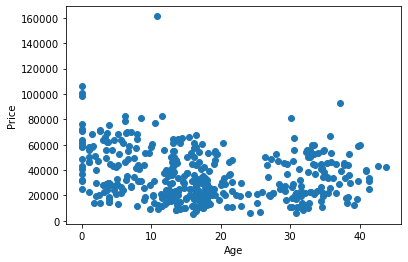

In [4]:
# 'House Age' vs "Total Price"
price=df["Total Price "]

age=df['House Age']

from matplotlib import pyplot as plt
  

plt.scatter(age,price)
plt.xlabel("Age")
plt.ylabel("Price")

plt.show()

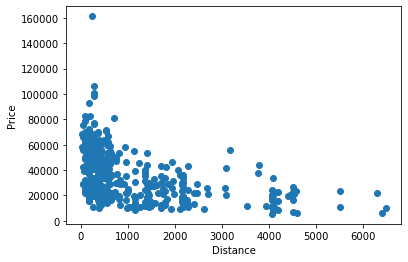

In [5]:
# 'Distance from nearest Metro station (km)' vs "House price of unit area"
distance=df['Distance from nearest Metro station (km)']
price=df["Total Price "]
plt.scatter(distance,price)
plt.xlabel("Distance")
plt.ylabel("Price")

plt.show()

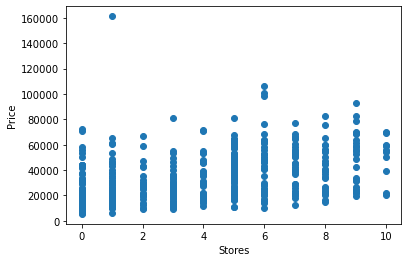

OrderedDict([(0, 67), (1, 46), (2, 24), (3, 46), (4, 31), (5, 67), (6, 37), (7, 31), (8, 30), (9, 25), (10, 10)])


In [6]:
from collections import OrderedDict
# 'Number of convenience stores' vs 'Total Price '
stores=df['Number of convenience stores']

plt.scatter(stores,price)
plt.xlabel("Stores")
plt.ylabel("Price")

plt.show()

d={}
for i in stores:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1
d = OrderedDict(sorted(d.items()))
print(d)#Getting the number of covenience stores

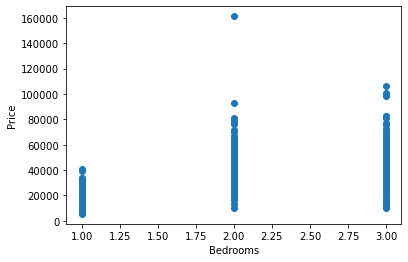

OrderedDict([(1, 141), (2, 137), (3, 136)])


In [10]:
# 'Number of bedrooms' vs 'Total Price '
stores=df['Number of bedrooms']
Price=df['Total Price ']
plt.scatter(stores,Price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.show()
d={}
for i in stores:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1
d = OrderedDict(sorted(d.items()))
print(d)#Getting the number of bedrooms

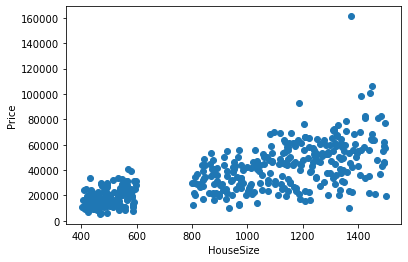

In [12]:
# 'House size (sqft)' vs 'Total Price '
Housesize=df['House size (sqft)']
Price=df['Total Price ']
plt.scatter(Housesize,Price)
plt.xlabel("HouseSize")
plt.ylabel("Price")

plt.show()

In [ ]:
# From the analysis and visualization above we have selected 3 primary features 'House size (sqft)','Distance from nearest Metro station (km)','House Age'
# and selected the Muliple regression model to predict the house prices

In [7]:
#importing machinelearing libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
Features=['House size (sqft)','Distance from nearest Metro station (km)','House Age']
reg=linear_model.LinearRegression()
reg.fit(df[Features],df['Total Price '] )

LinearRegression()

In [31]:
reg.coef_

array([  39.60861223,   -6.91252004, -254.15102902])

In [8]:
reg.intercept_

10697.385532527634

In [9]:
reg.predict([[1365,393,15]])

array([58234.2554209])

In [10]:
X=df[['House size (sqft)','Distance from nearest Metro station (km)','House Age']]
Y=df['Total Price ']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
c=linear_model.LinearRegression()
c.fit(X_train,y_train)


LinearRegression()

In [14]:
c.predict(X_test)

array([32443.54488263, 54621.81682253, 27518.01104735, 13485.69360667,
       49763.20107999, 52732.96226267, 22559.20569137,  8006.61181174,
       15396.67352409, 26046.85607635, 41921.11801212, 59069.36013502,
       26893.40954903, 43318.68797148, 25070.04316879, 64769.43361732,
       36375.56599112, 17979.16555427, 54458.71537996, 57115.61222966,
       50357.16954018, 33998.40330515, 44161.63831485, 52853.78012264,
       31590.02580615, 45320.95869483, 51165.06291323, 25448.07017938,
       48010.62391609, 61783.61414088, 20767.73284538, 26786.40280598,
       32962.85089107, 44182.07114085, 28329.33155591, 43873.52673208,
       23624.24446487, 31402.40974372, 44014.22335542, 51390.78011482,
       31929.16339728, 16500.53232142, 17864.56093899, 49024.24544613,
       57296.91213172, 50458.32517136, 60451.82661706, 45582.90271624,
       19870.67888124, 46636.49853422, 38603.10877258, 57372.53114496,
       56332.65703859, -2068.00708815, 17115.3149325 , 17529.87574402,
      

In [15]:
c.score(X_test,y_test) #Accuracy

0.775767734605855

In [16]:
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ElasticNet 
from sklearn.ensemble import RandomForestRegressor

b = BayesianRidge()
b.fit(X_train, y_train)
by = b.predict(X_test)
print("Accuracy of BayesianRidge",b.score(X_test,y_test))


e = ElasticNet(alpha = 0.01)
e.fit(X_train, y_train)
en = e.predict(X_test)
print("Accuracy of ElasticNet",e.score(X_test,y_test))

Rf = RandomForestRegressor(n_estimators=40)
Rf.fit(X_train, y_train)
Rfr = Rf.predict(X_test)
print("Accuracy of RandomForest",Rf.score(X_test,y_test))

Accuracy of BayesianRidge 0.7761082845649787
Accuracy of ElasticNet 0.7757679718035226
Accuracy of RandomForest 0.8154263887775712


In [ ]:
#Thus random forest gives the best accuracy therefore the machine learning model with the best fit is Random forest.